<a href="https://colab.research.google.com/github/ryandraper/neural-network-learning/blob/main/02_neural_network_classification_with_tensorflow_video.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Introduction to neural network Classification with TensorFlow

In this notebook we're going to learn how to write neural networks for classification problems.

A classification is where you try to classify something as one thing or another.
A few types of classification problems:
* Binary classification
* Multiclass classification
* Multilabel classification

# Creating data to view and fit


In [67]:
from sklearn.datasets import make_circles

# Make 1000 examples
n_samples = 1000

# Create circles
X, y = make_circles(n_samples,
                    noise=0.03,
                    random_state=42)

In [68]:
# Check out features
X

array([[ 0.75424625,  0.23148074],
       [-0.75615888,  0.15325888],
       [-0.81539193,  0.17328203],
       ...,
       [-0.13690036, -0.81001183],
       [ 0.67036156, -0.76750154],
       [ 0.28105665,  0.96382443]])

In [69]:
# Change the labels
y[:10]

array([1, 1, 1, 1, 0, 1, 1, 1, 1, 0])

Our data is a little hard to understand right now... let's visualize it


In [70]:
import pandas as pd
circles = pd.DataFrame({"X0":X[:,0], "X1":X[:,1], "label":y})
circles

,X0,X1,label
0,0.754246,0.231481,1
1,-0.756159,0.153259,1
2,-0.815392,0.173282,1
3,-0.393731,0.692883,1
4,0.442208,-0.896723,0
...,...,...,...
995,0.244054,0.944125,0
996,-0.978655,-0.272373,0
997,-0.136900,-0.810012,1
998,0.670362,-0.767502,0


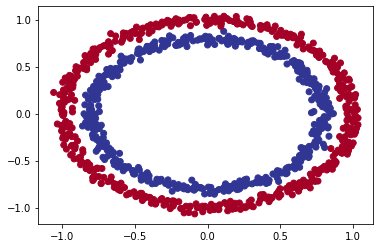

In [71]:
# Visualize with a plot
import matplotlib.pyplot as plt
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

## Input and output shapes

In [72]:
# Check the shapes of our features and lables
X.shape, y.shape

((1000, 2), (1000,))

In [73]:
# How many samples we're working with
len(X), len(y)

(1000, 1000)

In [74]:
X[0], y[0]

(array([0.75424625, 0.23148074]), 1)

## Steps in modelling

The steps in modelling with TensorFlow are typically:

1. Create or import a model
2. Compile the model
3. Fit the model
4. Evaluate the model
5. Tweak
6. Evaluate... 

In [75]:
import tensorflow as tf

In [76]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creat the model using Sequential API
model_1 = tf.keras.Sequential([
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_1.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_1.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 1s 5ms/step - loss: 6.0485 - accuracy: 0.4850
Epoch 2/5
32/32 [==============================] - 0s 5ms/step - loss: 5.1415 - accuracy: 0.4730
Epoch 3/5
32/32 [==============================] - 0s 4ms/step - loss: 4.2674 - accuracy: 0.4770
Epoch 4/5
32/32 [==============================] - 0s 5ms/step - loss: 2.3567 - accuracy: 0.4850
Epoch 5/5
32/32 [==============================] - 0s 4ms/step - loss: 0.7430 - accuracy: 0.4970


In [77]:
# Let's try and improve our model by training for longer...
model_1.fit(X, y, epochs=200, verbose=0)


In [78]:
model_1.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6935 - accuracy: 0.5000


[0.6934831142425537, 0.5]

Since we're working on a binary classification problem and our model is getting around 50% accuracy... it's performing as if it's guessing. 
So let's step things up a notch and add an extra layer.

In [79]:
# Set the random seed
tf.random.set_seed(42)

# 1. Creat the model using Sequential API
model_2 = tf.keras.Sequential([
    tf.keras.layers.Dense(1),
    tf.keras.layers.Dense(1)
])

# 2. Compile the model
model_2.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.SGD(),
                metrics=["accuracy"])

# 3. Fit the model
model_2.fit(X, y, epochs=5)

Epoch 1/5
32/32 [==============================] - 2s 4ms/step - loss: 1.2735 - accuracy: 0.4600
Epoch 2/5
32/32 [==============================] - 0s 3ms/step - loss: 0.7022 - accuracy: 0.4880
Epoch 3/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6958 - accuracy: 0.4600
Epoch 4/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6941 - accuracy: 0.4810
Epoch 5/5
32/32 [==============================] - 0s 3ms/step - loss: 0.6940 - accuracy: 0.4960


In [80]:
# 4. Evaluate the model
model_2.evaluate(X, y)

32/32 [==============================] - 0s 2ms/step - loss: 0.6932 - accuracy: 0.5140


[0.6931634545326233, 0.5139999985694885]

## Improving our Model

Let's look into our bag of tricks to see how we can improve our model.

1. Create a model - we might want to add more layers or increase number of hidden units within a layer. 
2. Compiling a model - here we might want to choose a different optimization function such as Adam
3. Fitting a model - perhaps we might fit our model for more epochs (leave it training for longer)

In [81]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (this time 3 layers)
model_3 = tf.keras.Sequential([
    tf.keras.layers.Dense(100), # add 100 dense neurons
    tf.keras.layers.Dense(10),
    tf.keras.layers.Dense(1),
])

# 2. Compile the model
model_3.compile(loss=tf.keras.losses.BinaryCrossentropy(),
                optimizer=tf.keras.optimizers.Adam(),
                metrics=["accuracy"])

# 3. Fit the model
model_3.fit(X, y, epochs=100, verbose=0)

In [82]:
#4 4. evaluate the model
model_3.evaluate(X, y)

32/32 [==============================] - 0s 3ms/step - loss: 0.6932 - accuracy: 0.5290


[0.6931790709495544, 0.5289999842643738]

In [83]:
model_3.predict(X)

32/32 [==============================] - 0s 2ms/step


array([[0.50225484],
       [0.50474495],
       [0.504953  ],
       [0.5066387 ],
       [0.49745005],
       [0.506723  ],
       [0.5064463 ],
       [0.5018216 ],
       [0.49910378],
       [0.50769436],
       [0.5011939 ],
       [0.50553864],
       [0.5067779 ],
       [0.4995922 ],
       [0.4986289 ],
       [0.4985656 ],
       [0.50271213],
       [0.49858147],
       [0.5036448 ],
       [0.5002303 ],
       [0.5035418 ],
       [0.5077279 ],
       [0.49785304],
       [0.50250643],
       [0.5064889 ],
       [0.5053088 ],
       [0.50672054],
       [0.5002774 ],
       [0.49840963],
       [0.49910563],
       [0.49885064],
       [0.5077523 ],
       [0.5063099 ],
       [0.5007317 ],
       [0.49764043],
       [0.50736046],
       [0.50638485],
       [0.50514346],
       [0.49851805],
       [0.5042317 ],
       [0.50000817],
       [0.5063749 ],
       [0.50068367],
       [0.49984372],
       [0.5013777 ],
       [0.50262976],
       [0.4981965 ],
       [0.505

To visualize our model's predictions, let's create a function `plot_decision_boundary()`, this function will: 

* Take in a trained model, features (X) and labels (y)
* Create a meshgrid of the different X values
* Make predictions across the meshgrid
* Plot the predictios as well as a line between zones (where each unique class falls)


In [84]:
import numpy as np
 
def plot_decision_boundary(model, X, y):
  """
  Plots the decision boundary created by a model predicting on X.
  """

  # Define the axis boundaries of the plot and create a meshgrid
  x_min, x_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  y_min, y_max = X[:, 0].min() - 0.1, X[:, 0].max() + 0.1
  xx, yy = np.meshgrid(np.linspace(x_min, x_max, 100),
                       np.linspace(y_min, y_max, 100))
  
  # Create X values (we're going to make prediction on these)
  x_in = np.c_[xx.ravel(), yy.ravel()]

  y_pred = model.predict(x_in)

  # Check for multi_class
  if len(y_pred[0]) > 1:
    print("doing multiclass classification")
    # We have to reshape our predictoin to get them ready for plotting
    y_pred = np.argmax(y_pred, axis=1).reshape(xx.shape)
  else:
    print("doing binary classification")
    y_pred = np.round(y_pred).reshape(xx.shape)

  # Plot the decision boundary
  plt.contourf(xx, yy, y_pred, cmap=plt.cm.RdYlBu, alpha=0.7)
  plt.scatter(X[:, 0], X[:, 1], c=y, s=40, cmap=plt.cm.RdYlBu)
  plt.xlim(xx.min(), xx.max())
  plt.ylim(yy.min(), yy.max())
  

313/313 [==============================] - 1s 3ms/step
doing binary classification


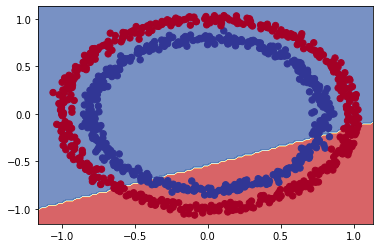

In [85]:
# Check out the predictions our model is making
plot_decision_boundary(model=model_3,
              X=X,
              y=y)

In [87]:
# Let's see if our model can be used for a reqgression problem...



# Set random seed
tf.random.set_seed(42)

# Create some regression data
X_regression = np.arange(0, 1000, 5)
y_regression = np.arange(100, 1100, 5)

# Split it into training and test sets
X_reg_train = X_regression[:150]
X_reg_test = X_regression[150:]
y_reg_train = y_regression[:150]
y_reg_test = y_regression[150:]

# Fit our model to the data
# Note: Before TensorFlow 2.7.0, this line would work
# model_3.fit(X_reg_train, y_reg_train, epochs=100)

# After TensorFlow 2.7.0, see here for more: https://github.com/mrdbourke/tensorflow-deep-learning/discussions/278
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train,
            epochs=100)

Epoch 1/100
5/5 [==============================] - 4s 9ms/step - loss: 385.1251 - mae: 385.1251
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 266.5859 - mae: 266.5859
Epoch 3/100
5/5 [==============================] - 0s 6ms/step - loss: 151.0780 - mae: 151.0780
Epoch 4/100
5/5 [==============================] - 0s 6ms/step - loss: 51.7363 - mae: 51.7363
Epoch 5/100
5/5 [==============================] - 0s 7ms/step - loss: 80.6819 - mae: 80.6819
Epoch 6/100
5/5 [==============================] - 0s 9ms/step - loss: 81.4674 - mae: 81.4674
Epoch 7/100
5/5 [==============================] - 0s 17ms/step - loss: 49.8353 - mae: 49.8353
Epoch 8/100
5/5 [==============================] - 0s 9ms/step - loss: 52.6721 - mae: 52.6721
Epoch 9/100
5/5 [==============================] - 0s 13ms/step - loss: 47.9437 - mae: 47.9437
Epoch 10/100
5/5 [==============================] - 0s 16ms/step - loss: 45.7846 - mae: 45.7846
Epoch 11/100
5/5 [==============================] 

Oh wait... we compiled our umodel for a binary classification problem.

But... we're now working on a regression problem, let's change the model to suit our data.

In [92]:
# Setup random seed
tf.random.set_seed(42)

# Recreate the model
model_3 = tf.keras.Sequential([
  tf.keras.layers.Dense(100),
  tf.keras.layers.Dense(10),
  tf.keras.layers.Dense(1)
])

# Change the loss and metrics of our compiled model
model_3.compile(loss=tf.keras.losses.mae, # change the loss function to be regression-specific
                optimizer=tf.keras.optimizers.Adam(),
                metrics=['mae']) # change the metric to be regression-specific

# Fit the recompiled model
model_3.fit(tf.expand_dims(X_reg_train, axis=-1), 
            y_reg_train, 
            epochs=100)

Epoch 1/100
5/5 [==============================] - 1s 6ms/step - loss: 429.0098 - mae: 429.0098
Epoch 2/100
5/5 [==============================] - 0s 6ms/step - loss: 310.3429 - mae: 310.3429
Epoch 3/100
5/5 [==============================] - 0s 4ms/step - loss: 195.6850 - mae: 195.6850
Epoch 4/100
5/5 [==============================] - 0s 5ms/step - loss: 76.3960 - mae: 76.3960
Epoch 5/100
5/5 [==============================] - 0s 4ms/step - loss: 69.0121 - mae: 69.0121
Epoch 6/100
5/5 [==============================] - 0s 7ms/step - loss: 89.8321 - mae: 89.8321
Epoch 7/100
5/5 [==============================] - 0s 12ms/step - loss: 61.7048 - mae: 61.7048
Epoch 8/100
5/5 [==============================] - 0s 10ms/step - loss: 45.1224 - mae: 45.1224
Epoch 9/100
5/5 [==============================] - 0s 7ms/step - loss: 46.1873 - mae: 46.1873
Epoch 10/100
5/5 [==============================] - 0s 8ms/step - loss: 42.9720 - mae: 42.9720
Epoch 11/100
5/5 [==============================] -

2/2 [==============================] - 0s 10ms/step


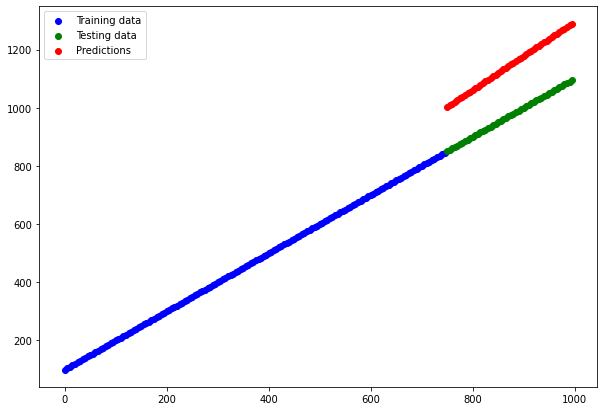

In [93]:

# Make predictions with our trained model
y_reg_preds = model_3.predict(y_reg_test)

# Plot the model's predictions against our regression data
plt.figure(figsize=(10, 7))
plt.scatter(X_reg_train, y_reg_train, c='b', label='Training data')
plt.scatter(X_reg_test, y_reg_test, c='g', label='Testing data')
plt.scatter(X_reg_test, y_reg_preds.squeeze(), c='r', label='Predictions')
plt.legend();

## The missing piece: Non-linearity

In [94]:
# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_4 = tf.keras.Sequential([
    tf.keras.layers.Dense(1, activation=tf.keras.activations.linear)
])

# 2. Compile the model
model_4.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_4.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 6.1002 - accuracy: 0.4850
Epoch 2/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0678 - accuracy: 0.4850
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0519 - accuracy: 0.4840
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0507 - accuracy: 0.4830
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0497 - accuracy: 0.4830
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0490 - accuracy: 0.4830
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0483 - accuracy: 0.4830
Epoch 8/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0475 - accuracy: 0.4830
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0468 - accuracy: 0.4840
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 6.0461 - accuracy: 0.4830
Epoch 11/

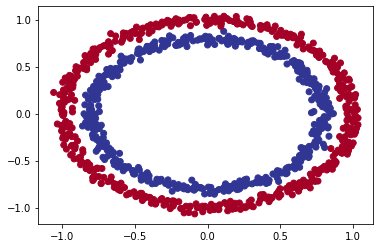

In [95]:
# Check out our data
plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.RdYlBu);

313/313 [==============================] - 1s 4ms/step
doing binary classification


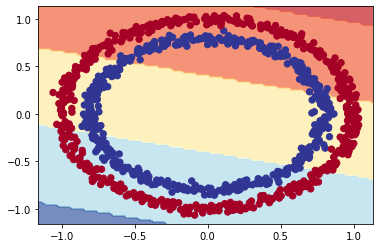

In [96]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_4,
                       X=X,
                       y=y)

Let's try to build our first neural network with a non-linear activation function.

In [97]:
# Set random seed
tf.random.set_seed(42)

# Create a model with a non-linear activation
model_5 = tf.keras.Sequential([
  tf.keras.layers.Dense(1, activation=tf.keras.activations.relu), # can also do activation='relu'
  tf.keras.layers.Dense(1) # output layer 
])

# Compile the model
model_5.compile(loss=tf.keras.losses.binary_crossentropy,
              optimizer=tf.keras.optimizers.Adam(),
              metrics=["accuracy"])

# Fit the model
history = model_5.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 2s 3ms/step - loss: 6.0746 - accuracy: 0.4860
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 6.0646 - accuracy: 0.4860
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 4.0763 - accuracy: 0.4850
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2854 - accuracy: 0.4860
Epoch 5/100
32/32 [==============================] - 0s 3ms/step - loss: 3.2228 - accuracy: 0.4870
Epoch 6/100
32/32 [==============================] - 0s 3ms/step - loss: 3.1568 - accuracy: 0.4860
Epoch 7/100
32/32 [==============================] - 0s 4ms/step - loss: 3.0477 - accuracy: 0.4860
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 2.9432 - accuracy: 0.4810
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 2.7858 - accuracy: 0.4800
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 2.6530 - accuracy: 0.4790
Epoch 11/

313/313 [==============================] - 1s 3ms/step
doing binary classification


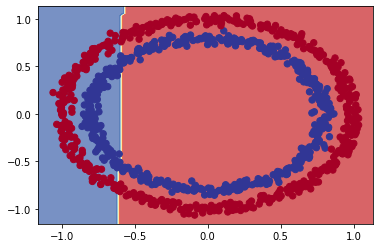

In [98]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_5,
                       X=X,
                       y=y)

In [99]:

# Set random seed
tf.random.set_seed(42)

# Create a model
model_6 = tf.keras.Sequential([
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 1, 4 neurons, ReLU activation
  tf.keras.layers.Dense(4, activation=tf.keras.activations.relu), # hidden layer 2, 4 neurons, ReLU activation
  tf.keras.layers.Dense(1) # ouput layer
])

# Compile the model
model_6.compile(loss=tf.keras.losses.binary_crossentropy,
                optimizer=tf.keras.optimizers.Adam(lr=0.001), # Adam's default learning rate is 0.001
                metrics=['accuracy'])

# Fit the model
history = model_6.fit(X, y, epochs=100)

Epoch 1/100
32/32 [==============================] - 1s 4ms/step - loss: 4.2579 - accuracy: 0.5000
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 3.9981 - accuracy: 0.5000
Epoch 3/100
32/32 [==============================] - 0s 3ms/step - loss: 3.7704 - accuracy: 0.5000
Epoch 4/100
32/32 [==============================] - 0s 5ms/step - loss: 3.3050 - accuracy: 0.5000
Epoch 5/100
32/32 [==============================] - 0s 6ms/step - loss: 1.8394 - accuracy: 0.4980
Epoch 6/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8955 - accuracy: 0.4410
Epoch 7/100
32/32 [==============================] - 0s 6ms/step - loss: 0.8441 - accuracy: 0.3970
Epoch 8/100
32/32 [==============================] - 0s 5ms/step - loss: 0.8162 - accuracy: 0.3760
Epoch 9/100
32/32 [==============================] - 0s 6ms/step - loss: 0.7923 - accuracy: 0.3760
Epoch 10/100
32/32 [==============================] - 0s 14ms/step - loss: 0.7734 - accuracy: 0.3720
Epoch 11

In [100]:
# evalueate the model
model_6.evaluate(X,y)

32/32 [==============================] - 0s 3ms/step - loss: 0.5407 - accuracy: 0.8380


[0.5407008528709412, 0.8379999995231628]

313/313 [==============================] - 1s 2ms/step
doing binary classification


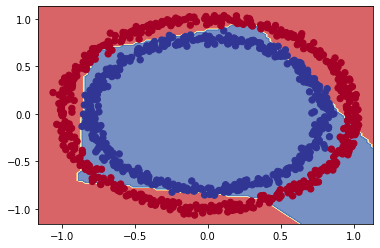

In [101]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_6,
                       X=X,
                       y=y)

In [102]:

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model
model_7 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(4, activation=tf.keras.activations.relu),
    tf.keras.layers.Dense(1, activation=tf.keras.activations.sigmoid)
])

# 2. Compile the model
model_7.compile(loss = "binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(learning_rate=0.001),
                metrics=["accuracy"])

# 3. Fit the model
history = model_7.fit(X, y, epochs=100, verbose=1)

Epoch 1/100
32/32 [==============================] - 1s 3ms/step - loss: 0.7044 - accuracy: 0.5080
Epoch 2/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7017 - accuracy: 0.4990
Epoch 3/100
32/32 [==============================] - 0s 4ms/step - loss: 0.7000 - accuracy: 0.4990
Epoch 4/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6988 - accuracy: 0.4800
Epoch 5/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6981 - accuracy: 0.4770
Epoch 6/100
32/32 [==============================] - 0s 4ms/step - loss: 0.6975 - accuracy: 0.4630
Epoch 7/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6968 - accuracy: 0.4690
Epoch 8/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6964 - accuracy: 0.4670
Epoch 9/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6959 - accuracy: 0.4580
Epoch 10/100
32/32 [==============================] - 0s 3ms/step - loss: 0.6956 - accuracy: 0.4530
Epoch 11/

In [103]:
# evalueate the model
model_7.evaluate(X,y)

32/32 [==============================] - 0s 5ms/step - loss: 0.6931 - accuracy: 0.5000


[0.6931495070457458, 0.5]

313/313 [==============================] - 1s 2ms/step
doing binary classification


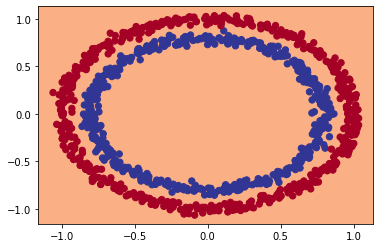

In [104]:
# Check the decision boundary for our model
plot_decision_boundary(model=model_7,
                       X=X,
                       y=y)

🤔 Question: What's wrong with the predictions we've made? Are we really evaluating our model correctly here? Hint: what data did the model learn on and what did we predict on?

Before we answer that, it's important to recognize what we've just covered.

🔑 Note: The combination of linear (straight lines) and non-linear (non-straight lines) functions is one of the key fundamentals of neural networks.

Now we're discussed the concept of linear and non-linear functions (or lines), let's see them in action.

In [105]:
# Create a toy tensor (similar to the data we pass into our models)
A = tf.cast(tf.range(-10, 10), tf.float32)
A

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

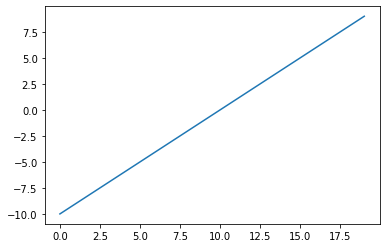

In [107]:

# Visualize our toy tensor
plt.plot(A);


A straight (linear) line!

Nice, now let's recreate the sigmoid function and see what it does to our data. You can also find a pre-built sigmoid function at tf.keras.activations.sigmoid.

In [108]:
# Sigmoid - https://www.tensorflow.org/api_docs/python/tf/keras/activations/sigmoid
def sigmoid(x):
  return 1 / (1 + tf.exp(-x))

# Use the sigmoid function on our tensor
sigmoid(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([4.5397872e-05, 1.2339458e-04, 3.3535014e-04, 9.1105117e-04,
       2.4726233e-03, 6.6928510e-03, 1.7986210e-02, 4.7425874e-02,
       1.1920292e-01, 2.6894143e-01, 5.0000000e-01, 7.3105860e-01,
       8.8079703e-01, 9.5257413e-01, 9.8201376e-01, 9.9330717e-01,
       9.9752742e-01, 9.9908900e-01, 9.9966466e-01, 9.9987662e-01],
      dtype=float32)>

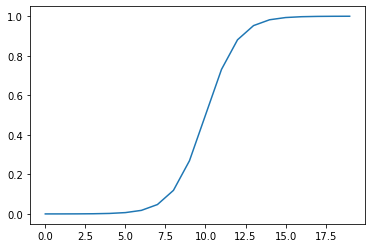

In [109]:
# Visualize our toy tensor transformed by sigmoid
plt.plot(sigmoid(A));

A non-straight (non-linear) line!

Okay, how about the ReLU function (ReLU turns all negatives to 0 and positive numbers stay the same)?

In [110]:

# ReLU - https://www.tensorflow.org/api_docs/python/tf/keras/activations/relu
def relu(x):
  return tf.maximum(0, x)

# Pass toy tensor through ReLU function
relu(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 0., 1., 2., 3., 4., 5., 6.,
       7., 8., 9.], dtype=float32)>

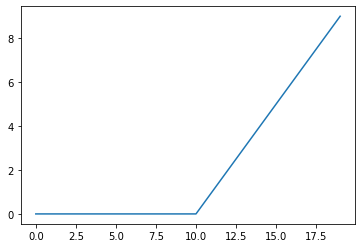

In [111]:
# Plot ReLU-modified tensor
plt.plot(relu(A));

Another non-straight line!

Well, how about TensorFlow's linear activation function?

In [112]:
# Linear - https://www.tensorflow.org/api_docs/python/tf/keras/activations/linear (returns input non-modified...)
tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=float32, numpy=
array([-10.,  -9.,  -8.,  -7.,  -6.,  -5.,  -4.,  -3.,  -2.,  -1.,   0.,
         1.,   2.,   3.,   4.,   5.,   6.,   7.,   8.,   9.],
      dtype=float32)>

Hmm, it looks like our inputs are unmodified...



In [113]:
# Does the linear activation change anything?
A == tf.keras.activations.linear(A)

<tf.Tensor: shape=(20,), dtype=bool, numpy=
array([ True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True,  True,  True,  True,  True,  True,  True,  True,
        True,  True])>

Okay, so it makes sense now the model doesn't really learn anything when using only linear activation functions, because the linear activation function doesn't change our input data in anyway.

Where as, with our non-linear functions, our data gets manipulated. A neural network uses these kind of transformations at a large scale to figure draw patterns between its inputs and outputs.

Now rather than dive into the guts of neural networks, we're going to keep coding applying what we've learned to different problems but if you want a more in-depth look at what's going on behind the scenes, check out the Extra Curriculum section below.

📖 Resource: For more on activation functions, check out the machine learning cheatsheet page on them.


## Evaluating and improving our classification model

If you answered the question above, you might've picked up what we've been doing wrong.

We've been evaluating our model on the same data it was trained on.

A better approach would be to split our data into training, validation (optional) and test sets.

Once we've done that, we'll train our model on the training set (let it find patterns in the data) and then see how well it learned the patterns by using it to predict values on the test set.

Let's do it.



In [114]:
# How many examples are in the whole dataset?
len(X)

1000

In [115]:
# Split into train and test sets
X_train, y_train = X[:800], y[:800]
X_test, y_test = X[800:], y[800:]

X_train.shape, X_test.shape, y_train.shape, y_test.shape

((800, 2), (200, 2), (800,), (200,))

In [116]:
# Let's recreate a model to fit on the training data and evaluate on the testing data

# Set the random seed
tf.random.set_seed(42)

# 1. Create the model (same as model_7)
model_8 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# 2. Compile the model
model_8.compile(loss="binary_crossentropy",
                optimizer=tf.keras.optimizers.Adam(lr=0.01),
                metrics=["accuracy"])

# 3. Fit the model
history = model_8.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 1s 4ms/step - loss: 0.6904 - accuracy: 0.5025
Epoch 2/25
25/25 [==============================] - 0s 4ms/step - loss: 0.6898 - accuracy: 0.5088
Epoch 3/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6893 - accuracy: 0.5125
Epoch 4/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6888 - accuracy: 0.5238
Epoch 5/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6884 - accuracy: 0.5275
Epoch 6/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6880 - accuracy: 0.5250
Epoch 7/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6873 - accuracy: 0.5300
Epoch 8/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6870 - accuracy: 0.5350
Epoch 9/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6865 - accuracy: 0.5350
Epoch 10/25
25/25 [==============================] - 0s 5ms/step - loss: 0.6859 - accuracy: 0.5362
Epoch 11/25
25/25 [

In [117]:
model_8.evaluate(X_test, y_test)

7/7 [==============================] - 0s 4ms/step - loss: 0.6867 - accuracy: 0.4950


[0.6866721510887146, 0.4950000047683716]

313/313 [==============================] - 1s 3ms/step
doing binary classification
313/313 [==============================] - 1s 3ms/step
doing binary classification


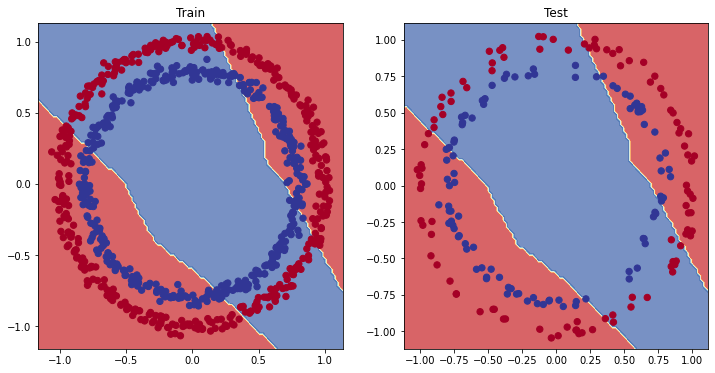

In [118]:
# Plot the decision boundaries for the training and test sets
# Plot the decision boundaries for the training and test sets
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.title("Train")
plot_decision_boundary(model_8, X=X_train, y=y_train)
plt.subplot(1, 2, 2)
plt.title("Test")
plot_decision_boundary(model_8, X=X_test, y=y_test)
plt.show()

# Plot the training curves (Loss curves)

In [120]:
# Convert the history object into a DataFrame
pd.DataFrame(history.history)

,loss,accuracy
0,0.690365,0.50250
1,0.689812,0.50875
2,0.689316,0.51250
3,0.688823,0.52375
4,0.688397,0.52750
5,0.688007,0.52500
6,0.687347,0.53000
7,0.686990,0.53500
8,0.686456,0.53500
9,0.685920,0.53625


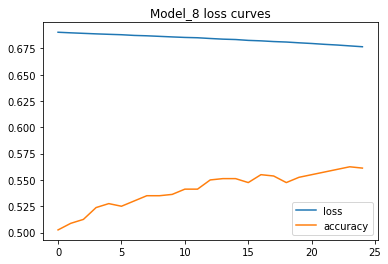

In [121]:
# Plot the loss curves
pd.DataFrame(history.history).plot()
plt.title("Model_8 loss curves");

🔑 **Note:** For many problems, the loss function going down means the model is improving (the predictions ground truth labels).

## Finding the best learning rate

To find the ideal learning rate (the learning rate where the loss decreases the most during training) we're going to use the following steps:
* A learning rate **callback** - you can think of a callback as an extra piece of functionality you can add to your model while it's training.
* Another model (we could use the same one as above, but we're practicing building models here)
* A modified loss curves plot.

In [122]:
# set random seed
tf.random.set_seed(42)

# Create a model (same as model_8)
model_9 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model
model_9.compile(loss="binary_crossentropy",
                optimizer="Adam",
                metrics=["accuracy"])

# Create a learning rate callback
lr_scheduler = tf.keras.callbacks.LearningRateScheduler(lambda epoch: 1e-4 * 10**(epoch/20))

# Fit the model (passing lr_scheduler callback)
history_9 = model_9.fit(X_train,
                        y_train,
                        epochs=100,
                        callbacks=[lr_scheduler])



Epoch 1/100
25/25 [==============================] - 3s 4ms/step - loss: 0.7217 - accuracy: 0.4988 - lr: 1.0000e-04
Epoch 2/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7210 - accuracy: 0.4963 - lr: 1.1220e-04
Epoch 3/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7202 - accuracy: 0.4963 - lr: 1.2589e-04
Epoch 4/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7194 - accuracy: 0.4963 - lr: 1.4125e-04
Epoch 5/100
25/25 [==============================] - 0s 4ms/step - loss: 0.7185 - accuracy: 0.4913 - lr: 1.5849e-04
Epoch 6/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7176 - accuracy: 0.4913 - lr: 1.7783e-04
Epoch 7/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7165 - accuracy: 0.4863 - lr: 1.9953e-04
Epoch 8/100
25/25 [==============================] - 0s 3ms/step - loss: 0.7156 - accuracy: 0.4875 - lr: 2.2387e-04
Epoch 9/100
25/25 [==============================] - 0s 4ms/step - loss:

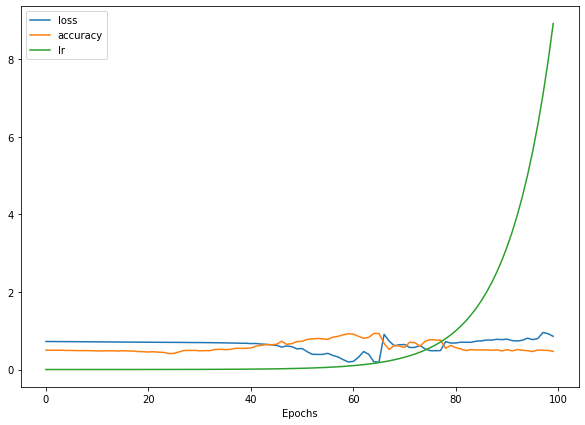

In [123]:
# Check out the history
pd.DataFrame(history_9.history).plot(figsize=(10, 7), xlabel="Epochs");

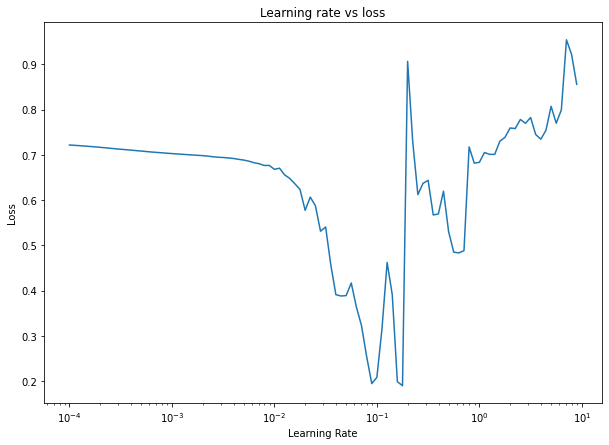

In [124]:
# Plot the learning rate versus the loss
lrs = 1e-4 * (10 ** (tf.range(100)/20))
plt.figure(figsize=(10, 7))
plt.semilogx(lrs, history_9.history["loss"])
plt.xlabel("Learning Rate")
plt.ylabel("Loss")
plt.title ("Learning rate vs loss");

In [125]:
# Example of other typical learning rates values:
10**0, 10**-1, 10**-2, 10**-3, 1e-4

(1, 0.1, 0.01, 0.001, 0.0001)

In [126]:
10**-2


0.01

In [130]:
# Let's try using a higher ideal learning rate with the same model as before

# Set random seed
tf.random.set_seed(42)

# Create the model
model_10 = tf.keras.Sequential([
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(4, activation="relu"),
    tf.keras.layers.Dense(1, activation="sigmoid")
])

# Compile the model with the ideal learning rate
model_10.compile(loss="binary_crossentropy",
                 optimizer=tf.keras.optimizers.Adam(lr=0.02),
                 metrics=["accuracy"])

# Fit the model for 20 epochs (5 less than before)
history_10 = model_10.fit(X_train, y_train, epochs=25)

Epoch 1/25
25/25 [==============================] - 3s 12ms/step - loss: 0.6902 - accuracy: 0.5263
Epoch 2/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6857 - accuracy: 0.5250
Epoch 3/25
25/25 [==============================] - 0s 9ms/step - loss: 0.6835 - accuracy: 0.5250
Epoch 4/25
25/25 [==============================] - 0s 10ms/step - loss: 0.6823 - accuracy: 0.5300
Epoch 5/25
25/25 [==============================] - 0s 11ms/step - loss: 0.6813 - accuracy: 0.5325
Epoch 6/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6806 - accuracy: 0.5312
Epoch 7/25
25/25 [==============================] - 0s 6ms/step - loss: 0.6800 - accuracy: 0.5362
Epoch 8/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6796 - accuracy: 0.5337
Epoch 9/25
25/25 [==============================] - 0s 7ms/step - loss: 0.6792 - accuracy: 0.5387
Epoch 10/25
25/25 [==============================] - 0s 9ms/step - loss: 0.6786 - accuracy: 0.5375
Epoch 11/25
25/

⚠ **Note:** somewhere along the way my data got all messed up compared to his, but I'm not going to try to fix it to match at this point because it doesn't really matter, I'm still learning the concepts.